In [6]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


#My Code
class Cast():
    def __init__(self, c):
        self.character = c['character']['name']
        self.name = c['person']['name']
        self.country = c['person']['country']
        self.birthday = c['person']['birthday']
        self.link_cast = generic_image
        
        if c['person']['image']:
            self.link_cast = c['person']['image']['medium']
        else:
            self.link_cast = generic_image
        
    def cast_info(self):
        print(self.character, self.name, self.birthday, self.birthday)
        display(Image(self.link))
    def __repr__(self):
        return f"{self.name} as {self.character} {display(Image(self.link_cast))}\n"

In [2]:


class Video():
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.cast = []
        
    def get_info(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
                    
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
            
                    
        # Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode erros: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        
        #My Code
        c = requests.get(f'https://api.tvmaze.com/shows/{self.id}/cast')
        cast = c.json()
        
        self.cast = [Cast(ca) for ca in cast]
        print(self.cast)
        
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title} {self.summary}"

In [3]:
class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    # add a user
    def add_user(self, name = ''):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    # choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user. ")
                
    #add to watchlist 
    def add_to_watch_list(self, query = ""):
        show = Series()
        
        show.get_info(query)
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist! ")
        
    # choose from our watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        watch = input("What would you like to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
        
        else:
            response = input(f"{watch} is not in your watch list.... would you like to add it y/n?")
            
            if response in ('yes', 'y'):
                self.add_to_watch_list(watch)
                
                print("...........")
                sleep(2)
                print("...........")
                self.watch_list[-1].watch()
                
    # run function to drive program
    def run(self):
        """
        Method Allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
                What would you like to do?
                
                Search - Search for shows
                Watch - Pick something from your watch list
                Add - add a new user
                Quit - close the application            
            """)
            
        while True: 
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == "quit":
                print(f"Thanks for watching! {self.current_user}! Now go outside! ")
                break
                
            else:
                print("Invalid input, please choose from the list! ")

In [4]:
show = Theater()


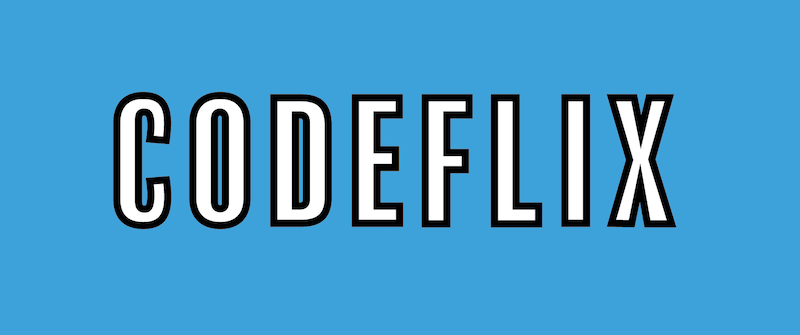

Create a profile: mo
Users: 
Mo
Choose a user: mo

                What would you like to do?
                
                Search - Search for shows
                Watch - Pick something from your watch list
                Add - add a new user
                Quit - close the application            
            
What would you like to do? (search, watch, add, quit) watch
What would you like to watch? friends
friends is not in your watch list.... would you like to add it y/n?y


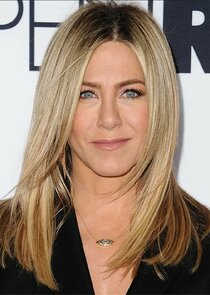

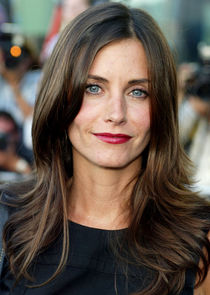

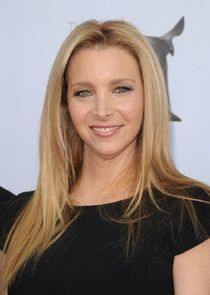

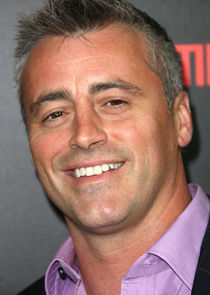

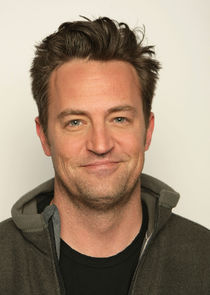

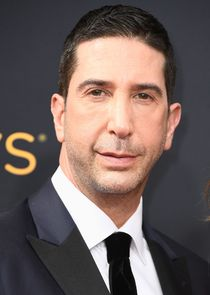

[Jennifer Aniston as Rachel Green None

, Courteney Cox as Monica Geller None

, Lisa Kudrow as Phoebe Buffay None

, Matt LeBlanc as Joey Tribbiani None

, Matthew Perry as Chandler Bing None

, David Schwimmer as Ross Geller None

]
Friends has 236 episodes.
Friends has been added to the watchlist! 
...........
...........
now playing The One Where Monica Gets a Roommate


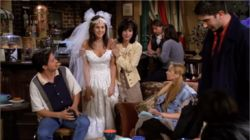

now playing The One With the Sonogram at the End


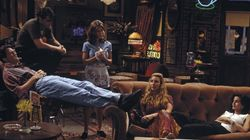

now playing The One With the Thumb


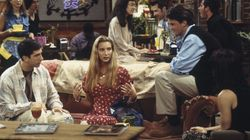

KeyboardInterrupt: Interrupted by user

In [5]:
show.run()